# Implementación de la base de datos en Python



In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Renombrar las columnas

In [ ]:
df.rename(columns = {0: "Largo del sepalo", 1: "Ancho del sepalo", 2:"Largo del petalo", 3: "Ancho del petalo", 4:"Clase"}, inplace= True )
df.head()

,Largo del sepalo,Ancho del sepalo,Largo del petalo,Ancho del petalo,Clase
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Análisis de la base de datos Iris

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Largo del sepalo  150 non-null    float64
 1   Ancho del sepalo  150 non-null    float64
 2   Largo del petalo  150 non-null    float64
 3   Ancho del petalo  150 non-null    float64
 4   Clase             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB




*   La base de datos contiene 150 entradas y 5 columnas relacionadas con las medidas de las flores de iris.

* Hay 4 columnas numéricas (float64) y 1 columna categórica (object)

* No hay valores nulos en ninguna de las columnas, lo que indica un conjunto de datos completo.


## Análisis de la variable Clase

<Axes: xlabel='Clase', ylabel='count'>

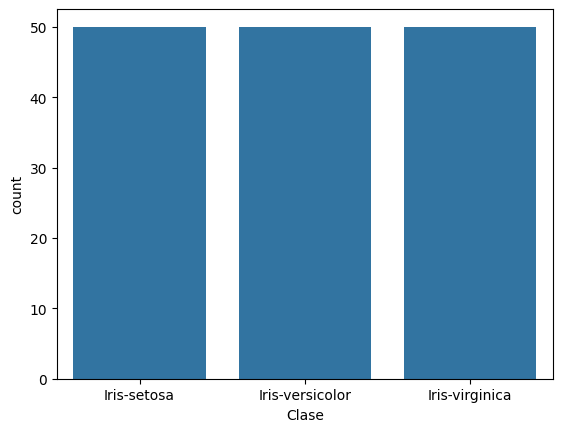

In [ ]:
import seaborn as sns
sns.countplot(x="Clase", data=df)

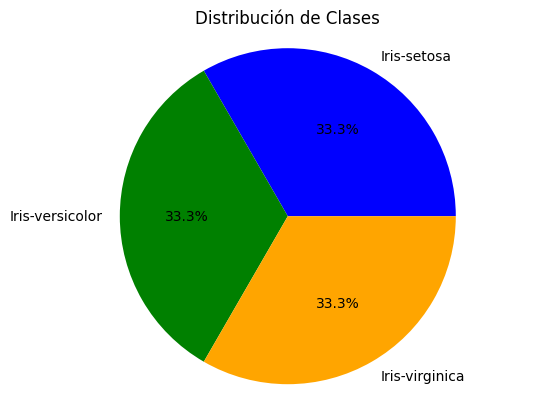

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

clase_counts = df["Clase"].value_counts()

plt.pie(clase_counts, labels=clase_counts.index, autopct='%1.1f%%', colors=["blue", "green", "orange"])
plt.title("Distribución de Clases")
plt.axis("equal")

plt.show()

*  Las tres clases de Iris (setosa, versicolor, virginica) tienen una distribución equilibrada con 50 muestras cada una.


## Análisis de las otras variables

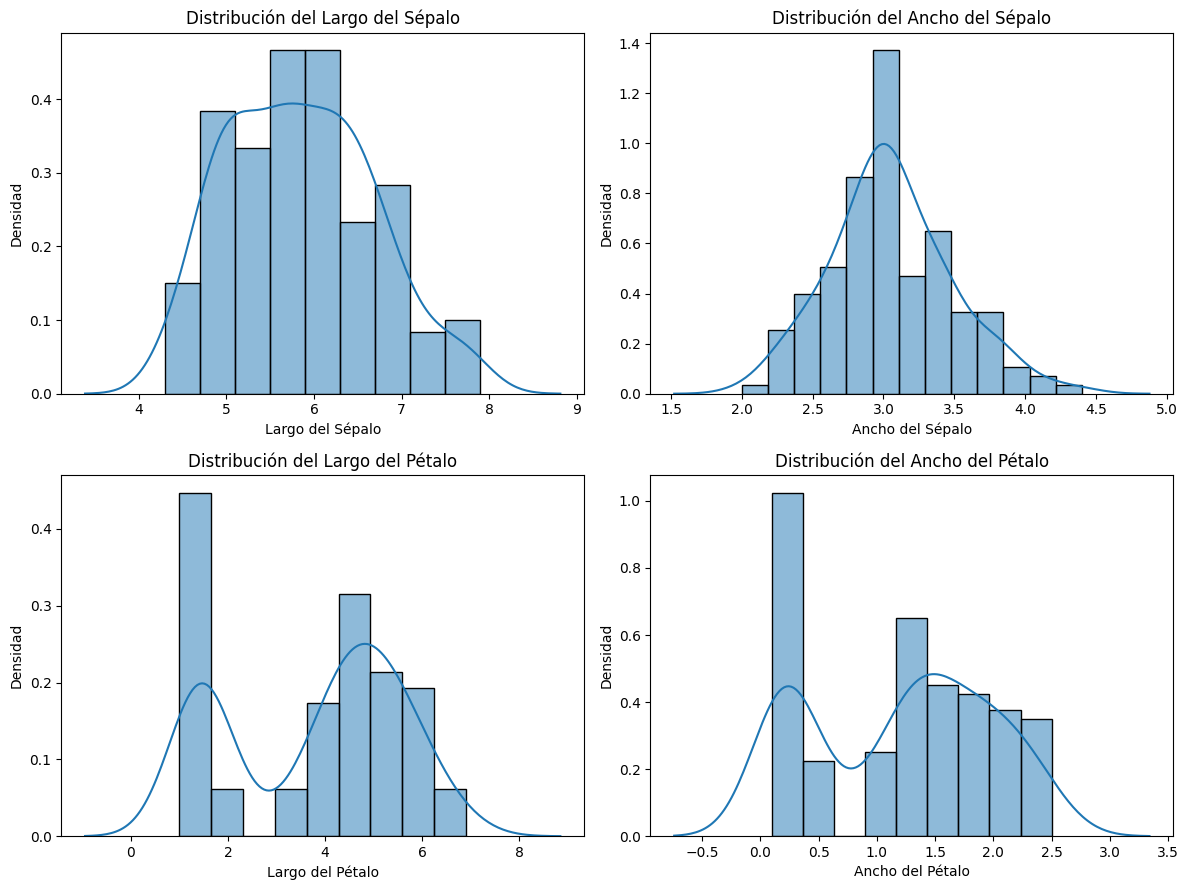

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 9))


plt.subplot(2, 2, 1)
sns.histplot(df["Largo del sepalo"], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Distribución del Largo del Sépalo")
plt.xlabel("Largo del Sépalo")
plt.ylabel("Densidad")


plt.subplot(2, 2, 2)
sns.histplot(df["Ancho del sepalo"], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Distribución del Ancho del Sépalo")
plt.xlabel("Ancho del Sépalo")
plt.ylabel("Densidad")

plt.subplot(2, 2, 3)
sns.histplot(df["Largo del petalo"], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Distribución del Largo del Pétalo")
plt.xlabel("Largo del Pétalo")
plt.ylabel("Densidad")

plt.subplot(2, 2, 4)
sns.histplot(df["Ancho del petalo"], kde=True, stat="density", kde_kws=dict(cut=3))
plt.title("Distribución del Ancho del Pétalo")
plt.xlabel("Ancho del Pétalo")
plt.ylabel("Densidad")

plt.tight_layout()
plt.show()

* Las distribuciones del largo y ancho del pétalo muestran comportamientos bimodales, lo que sugiere la presencia de diferentes especies de iris.

* las Distribuciones de Largo y Ancho del sépalo muestran un comportamiento unimodal sin sesgos en ninguna de los dos lados.

## Pruebas de normalidad

In [ ]:
from scipy.stats import shapiro
variables_cuantitativas = df.select_dtypes(include=['float64'])
# Realizar la prueba de normalidad de Shapiro-Wilk para cada columna
for columna in variables_cuantitativas.columns:
  stat, p_value = shapiro(variables_cuantitativas[columna])
  print(f'Variable: {columna}')
  print(f'Estadístico de prueba: {stat}')
  print(f'Valor p: {p_value}')
  # Interpretar los resultados
  alpha = 0.05

  if p_value > alpha:
    print('No podemos rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.')
  else:
    print('Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.')
    print('-' * 100)

Variable: Largo del sepalo
Estadístico de prueba: 0.9760899543762207
Valor p: 0.01018026564270258
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
----------------------------------------------------------------------------------------------------
Variable: Ancho del sepalo
Estadístico de prueba: 0.9837920665740967
Valor p: 0.07518772780895233
No podemos rechazar la hipótesis nula. Los datos parecen seguir una distribución normal.
Variable: Largo del petalo
Estadístico de prueba: 0.8764244318008423
Valor p: 7.545183366985952e-10
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
----------------------------------------------------------------------------------------------------
Variable: Ancho del petalo
Estadístico de prueba: 0.9026243686676025
Valor p: 1.8646931110311016e-08
Rechazamos la hipótesis nula. Los datos no siguen una distribución normal.
---------------------------------------------------------------------------------------

## Histogramas

### Histograma de Largo del sépalo para las clases

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

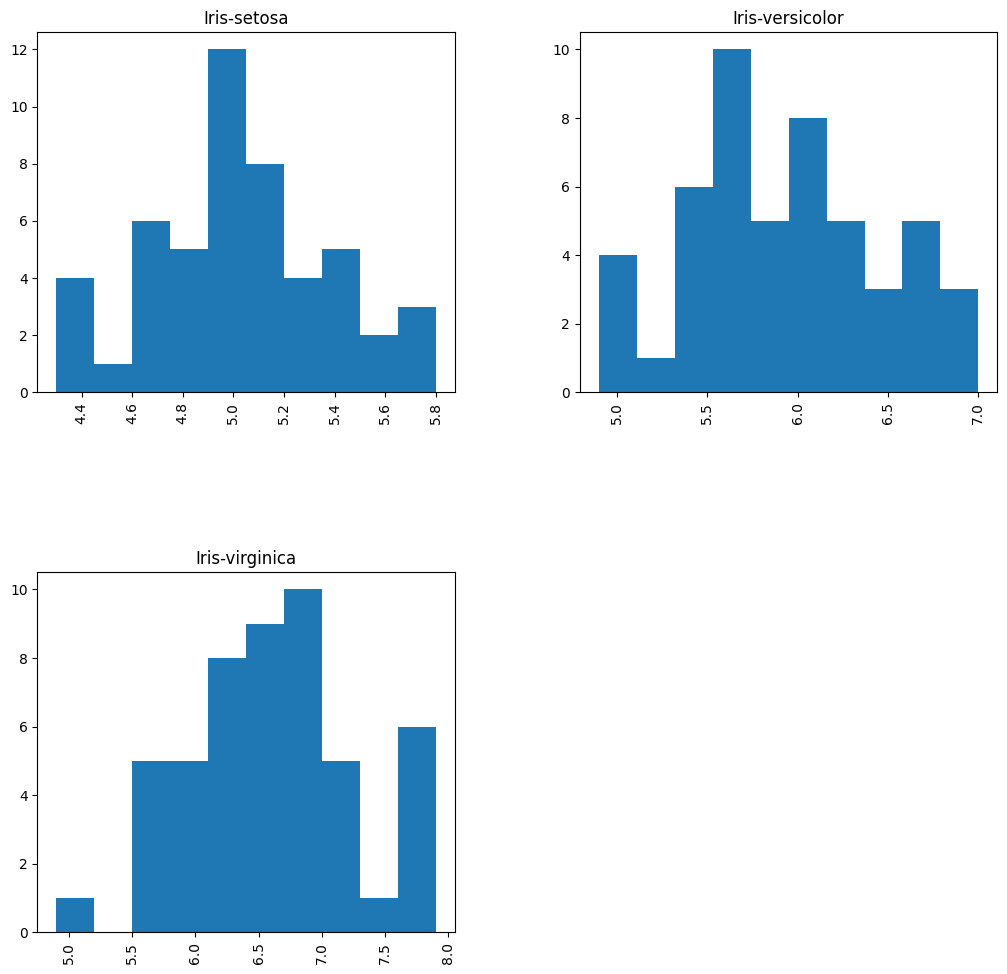

In [ ]:
df.hist(by='Clase',column = "Largo del sepalo", figsize=(12,12))


* Iris-setosa: tiene un largo de sépalo entre 4.5 y 5.5.
* Iris-versicolor: Tiene un rango más amplio pero se concentra principalmente entre 5.0 y 7.0.
* Iris-virginica: También tiene un rango amplio pero está más concentrado entre 5.5 y 7.0. Sin embargo cuando el largo del petalo mide 7.5 hay pocas que son Iris-virginica

###  Histograma Ancho del sépalo para las clases de iris

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

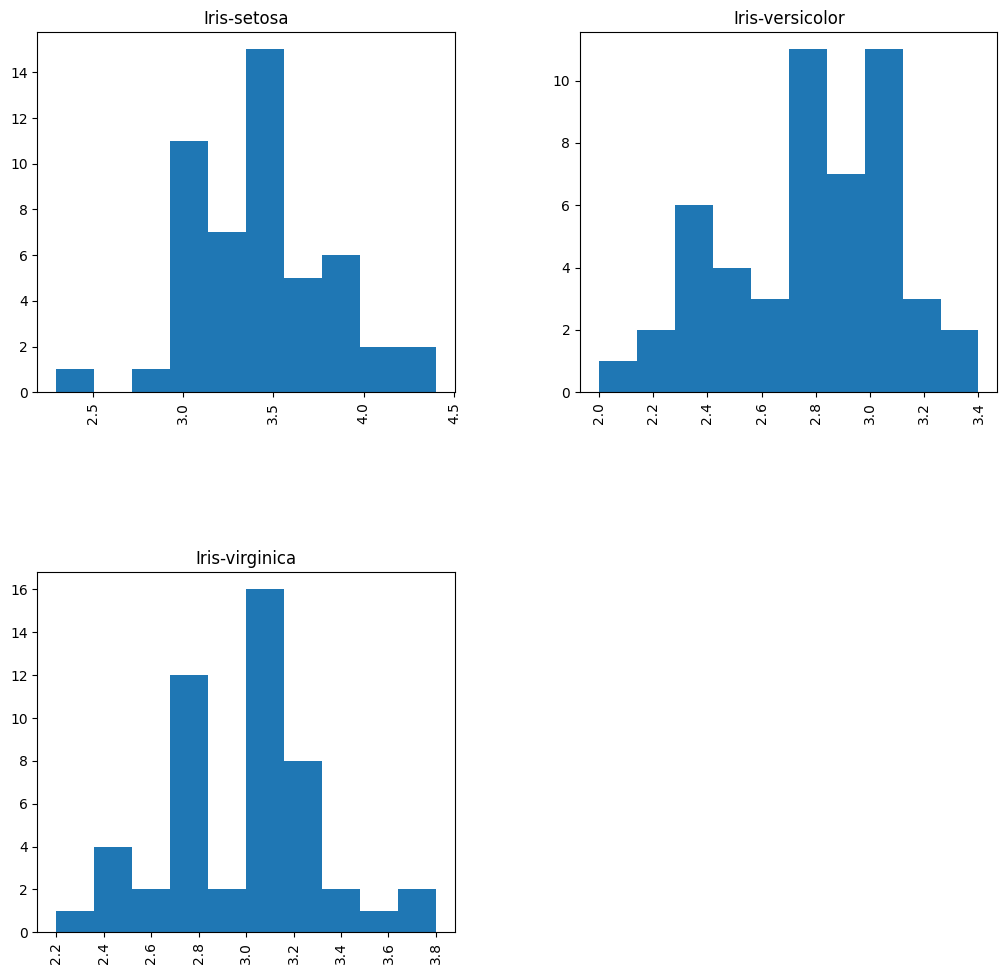

In [ ]:
df.hist(by='Clase',column = "Ancho del sepalo", figsize=(12,12))



* Iris-setosa: tiene un sépalo más ancho en comparación con las otras dos clases, con la mayoría entre 3.0 y 4.0 cm.

* Iris-versicolor: La anchura del sépalo se concentra principalmente entre 2.7 y 3.1 cm.

* Iris-virginica: Tiene una distribución similar a versicolor pero ligeramente más ancha, principalmente en el rango de 2.7 a 3.3 cm. Sin embargo cuando la anchura del sépalo mide alrededor de 2.9 a 3 hay pocas en la clase de Iris-virginica



### Histograma del largo del pétalo para las clases de iris

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

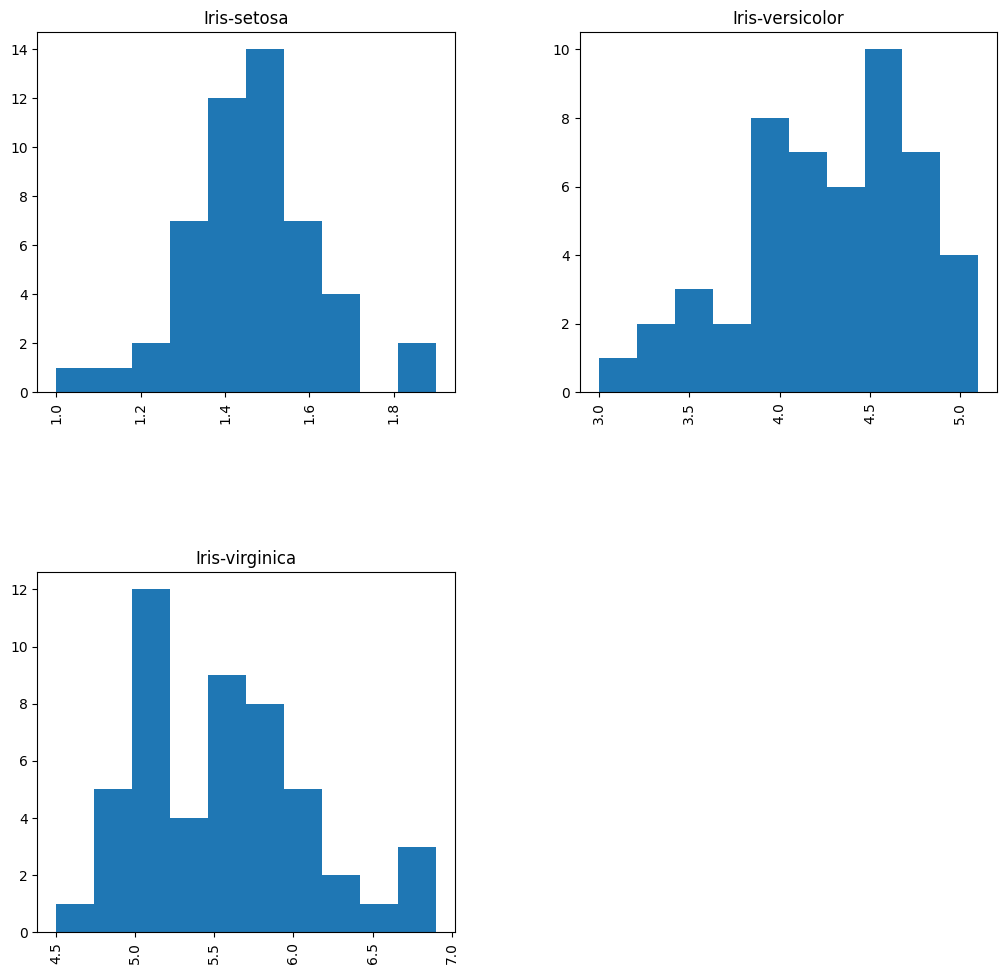

In [ ]:
df.hist(by='Clase',column = "Largo del petalo", figsize=(12,12))

*  Iris-setosa: Los pétalos son notablemente más cortos, con la mayoría concentrados alrededor de 1.3 a 1.6 cm.

* Iris-versicolor: Los pétalos tienen una longitud moderada, con un pico de distribución alrededor de 4.7 cm y la mayoria se encuentra cuando el largo del petalo esta entre 3.7 a 5.

* Iris-virginica: Los pétalos son más largos, con la mayoría entre 5 y 6 cm. Sin embargo , cuando el largo del pétalo mide alrededor de 3.3 hay pocas flores que se pueden clasificar como Iris-virginica.

### Histogramas del Ancho del pétalo para las clases de iris

array([[<Axes: title={'center': 'Iris-setosa'}>,
        <Axes: title={'center': 'Iris-versicolor'}>],
       [<Axes: title={'center': 'Iris-virginica'}>, <Axes: >]],
      dtype=object)

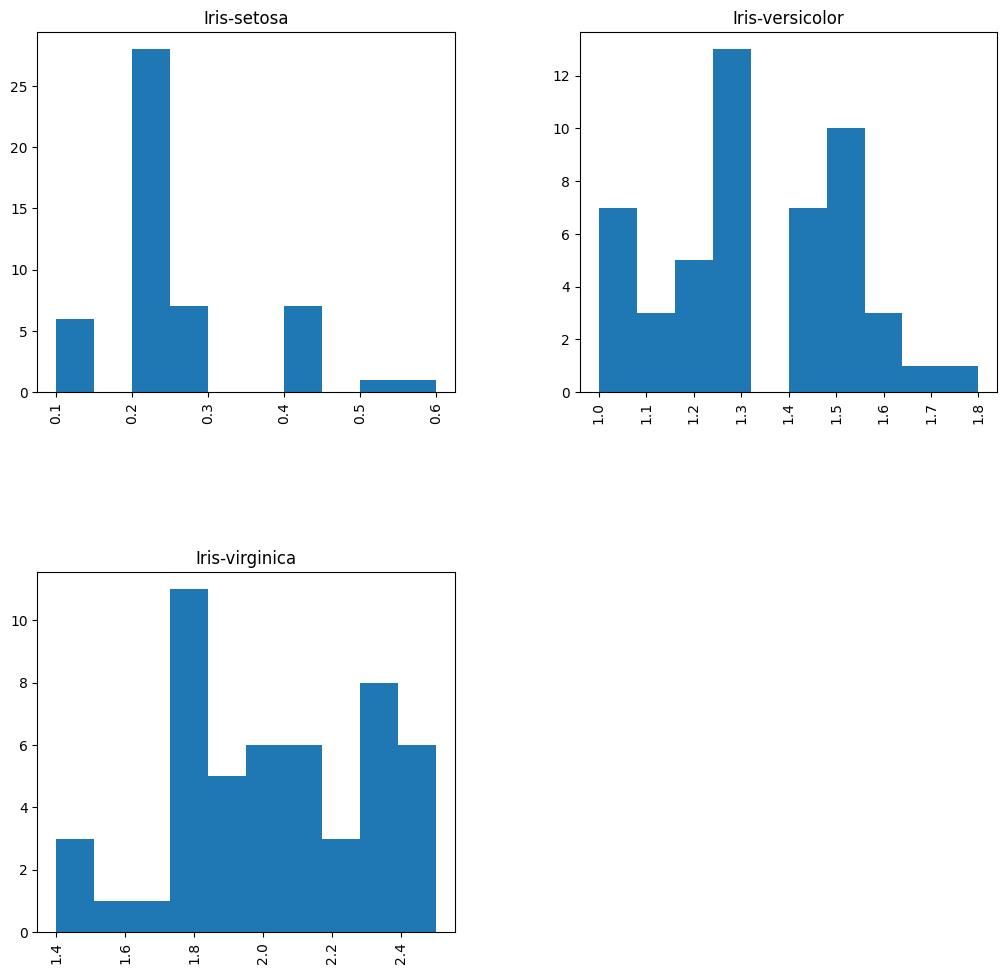

In [ ]:
df.hist(by='Clase',column = "Ancho del petalo", figsize=(12,12))

* Iris-setosa: Tiene un ancho de pétalo notablemente menor, concentrándose principalmente entre 0.2 y 0.3.

* Iris-versicolor: El ancho de pétalo se encuentra generalmente entre 1.0 y 1.7, mostrando una distribución más amplia que la de Iris-setosa. Sin embargo , cuando el ancho del pétalo mide alredor de 1.3 a 1.4 no hay ninguna flor que se pueda clasificar como Iris-versicolor

* Iris-virginica: Presenta la distribución más dispersa de ancho de pétalo, con la mayoría de los datos entre 1.7 y 2.4, lo que indica una mayor variabilidad en comparación con las otras dos clases.

## Media y Coeficiente de variación en comparación de las clases

In [ ]:
import pandas as pd
import numpy as np
pd.pivot_table(df, index=['Clase'], columns= [], aggfunc=np.mean)


,Ancho del petalo,Ancho del sepalo,Largo del petalo,Largo del sepalo
Clase,,,,
Iris-setosa,0.244,3.418,1.464,5.006
Iris-versicolor,1.326,2.770,4.260,5.936
Iris-virginica,2.026,2.974,5.552,6.588


In [ ]:
import numpy as np

def coef_vari(datos):
  desviacion_estandar = np.std(datos)
  media = np.mean(datos)
  coef_var = (desviacion_estandar / media) * 100
  return coef_var
piv = pd.pivot_table(df, index=['Clase'], columns= [], aggfunc=(coef_vari))
print(piv)
print("-"*100)
print("Promedio de Coeficiente de Variación por Producto\n")
print(piv.mean(axis=1))

                 Ancho del petalo  Ancho del sepalo  Largo del petalo  \
Clase                                                                   
Iris-setosa             43.496719         11.035544         11.732738   
Iris-versicolor         14.763587         11.214603         10.919909   
Iris-virginica          13.420024         10.734882          9.840560   

                 Largo del sepalo  
Clase                              
Iris-setosa              6.970575  
Iris-versicolor          8.608210  
Iris-virginica           9.555080  
----------------------------------------------------------------------------------------------------
Promedio de Coeficiente de Variación por Producto

Clase
Iris-setosa        18.308894
Iris-versicolor    11.376577
Iris-virginica     10.887636
dtype: float64


*

 Las clases de iris muestran diferentes grados de variabilidad en sus medidas. Iris-setosa tiene la mayor variabilidad en el ancho del pétalo, mientras que Iris-virginica muestra una mayor variabilidad en el largo del sépalo. Lo que siginifica que sus medias no desccriben significativamente a las diferentes clases de Iris

## Boxplot por clases de Iris

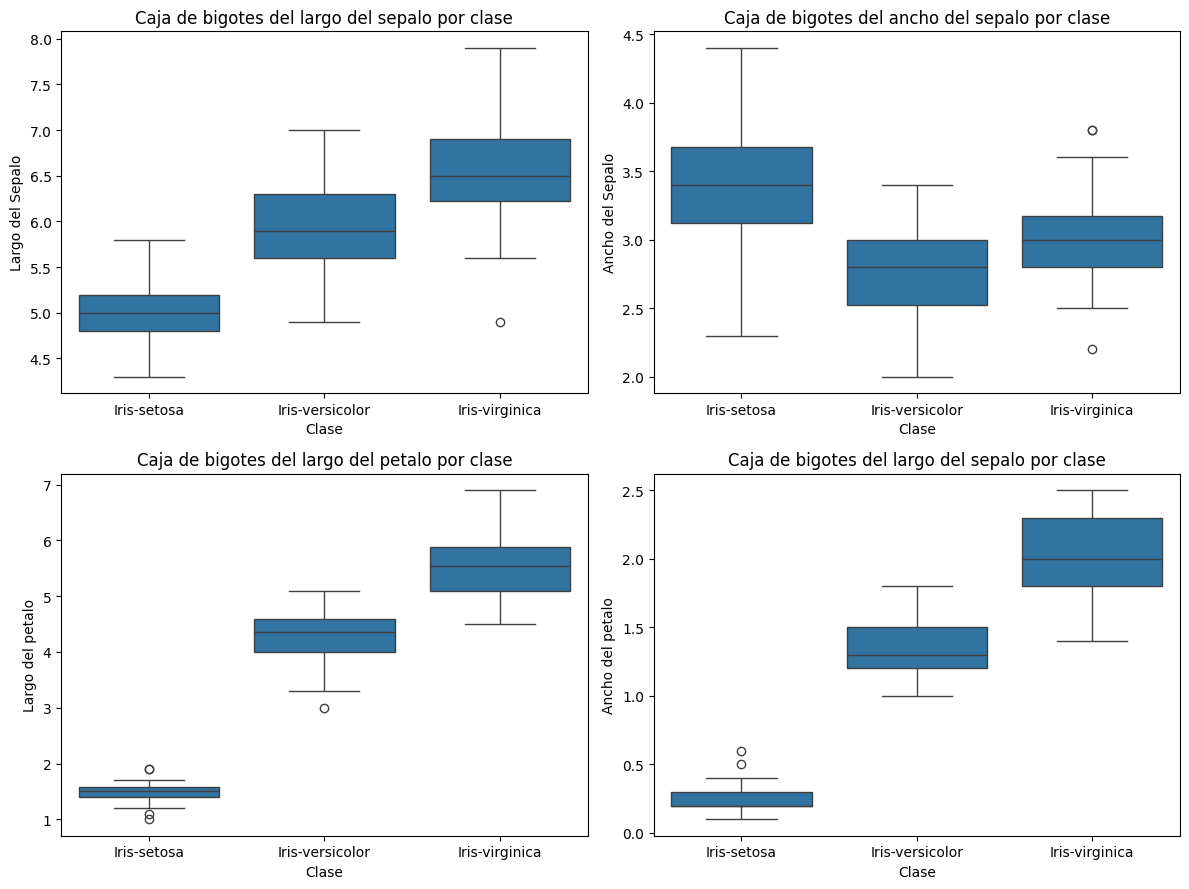

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con cuatro subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(12, 9))

# Gráfico 1: Largo del sépalo
sns.boxplot (x="Clase", y="Largo del sepalo", data=df, ax=axs[0, 0])
axs[0, 0].set_title("Caja de bigotes del largo del sepalo por clase")
axs[0, 0].set_xlabel("Clase")
axs[0, 0].set_ylabel("Largo del Sepalo")

# Gráfico 2: Ancho del sépalo
sns.boxplot (x="Clase", y="Ancho del sepalo", data=df, ax=axs[0, 1])
axs[0, 1].set_title("Caja de bigotes del ancho del sepalo por clase")
axs[0, 1].set_xlabel("Clase")
axs[0, 1].set_ylabel("Ancho del Sepalo")


# Gráfico 3: Largo del pétalo
sns.boxplot (x="Clase", y="Largo del petalo", data=df, ax=axs[1, 0])
axs[1, 0].set_title("Caja de bigotes del largo del petalo por clase")
axs[1, 0].set_xlabel("Clase")
axs[1, 0].set_ylabel("Largo del petalo")


# Gráfico 4: Ancho del pétalo
sns.boxplot (x="Clase", y="Ancho del petalo", data=df, ax=axs[1, 1])
axs[1, 1].set_title("Caja de bigotes del largo del sepalo por clase")
axs[1, 1].set_xlabel("Clase")
axs[1, 1].set_ylabel("Ancho del petalo")


# Ajusta los espacios entre subplots
plt.tight_layout()

# Muestra los gráficos
plt.show()




*   Iris Setosa: Se distingue por tener el largo de sépalos y largo y ancho de pétalos más pequeños en comparación con las otras dos especies.

* Iris Versicolor y Virginica: Estas especies tienen medidas más grandes de sépalos y pétalos, con Iris virginica generalmente presentando los valores más altos.



## Trasformación de los datos de clase

In [ ]:
df["Clase"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
# Crear una nueva columna "clase" con valores iniciales en 0

# Actualizar los valores según las especies
df.loc[df['Clase'] == 'Iris-setosa' , 'Clase'] = 0
df.loc[df['Clase'] == 'Iris-versicolor', 'Clase'] =1
df.loc[df['Clase'] == 'Iris-virginica' , 'Clase'] = 2

df["Clase"] = df["Clase"].astype(int)

df.head()


,Largo del sepalo,Ancho del sepalo,Largo del petalo,Ancho del petalo,Clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df["Clase"].unique()

array([0, 1, 2])

## Correlación entre variables

In [ ]:
corr_mat = df[['Clase', 'Largo del sepalo',"Ancho del sepalo", "Largo del petalo", "Ancho del petalo"]].corr()
corr_mat


,Clase,Largo del sepalo,Ancho del sepalo,Largo del petalo,Ancho del petalo
Clase,1.000000,0.782561,-0.419446,0.949043,0.956464
Largo del sepalo,0.782561,1.000000,-0.109369,0.871754,0.817954
Ancho del sepalo,-0.419446,-0.109369,1.000000,-0.420516,-0.356544
Largo del petalo,0.949043,0.871754,-0.420516,1.000000,0.962757
Ancho del petalo,0.956464,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Matriz de correlación')

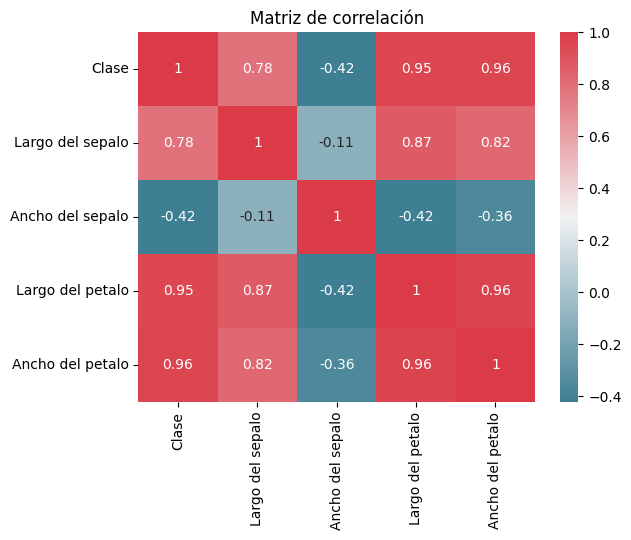

In [ ]:
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True)
plt.title("Matriz de correlación")

* Correlación Positiva Fuerte: El Largo del pétalo tiene una correlación positiva fuerte con la Clase y el Ancho del pétalo, lo que sugiere que a medida que el largo del pétalo aumenta, también lo hace su ancho y su asociación con la clase de la flor

* Correlación Moderada: Existe una correlación positiva moderada entre el Largo del sépalo y tanto la Clase como el Largo del pétalo.

* Correlaciones Negativas: El Ancho del sépalo muestra correlaciones negativas con las demás variables, indicando que a medida que el ancho del sépalo aumenta, las otras medidas tienden a disminuir.

## Anova

### Anova de Largo del sépalo

In [ ]:
!pip install pingouin
from pingouin import pairwise_ttests
pairwise_results = pairwise_ttests(dv='Largo del sepalo', between = ['Clase'], padjust='bonf', data=df)
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Clase,Iris-setosa,Iris-versicolor,False,True,-10.520986,98.0,two-sided,8.985235e-18,2.695571e-17,bonf,4.19e+14,-2.088053
1,Clase,Iris-setosa,Iris-virginica,False,True,-15.386196,98.0,two-sided,6.892546e-28,2.067764e-27,bonf,2.948e+24,-3.053629
2,Clase,Iris-versicolor,Iris-virginica,False,True,-5.629165,98.0,two-sided,1.724856e-07,5.174569e-07,bonf,7.037e+04,-1.117195


El valor p corregido es bajo de 2.69e-17, 2.06e-27 y 5.17e-7 respectivamente cada uno, lo que indica una diferencia significativa en la media de la longitud del sépalo entre todas las especies.

### Anova ancho del sépalo

In [14]:
!pip install pingouin
from pingouin import pairwise_ttests
pairwise_results = pairwise_ttests(dv='Ancho del sepalo', between = ['Clase'], padjust='bonf', data=df)
pairwise_results

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Clase,Iris-setosa,Iris-versicolor,False,True,9.282773,98.0,two-sided,4.362239e-15,1.308672e-14,bonf,1.079e+12,1.842310
1,Clase,Iris-setosa,Iris-virginica,False,True,6.289385,98.0,two-sided,8.916634e-09,2.674990e-08,bonf,1.101e+06,1.248226
2,Clase,Iris-versicolor,Iris-virginica,False,True,-3.205761,98.0,two-sided,1.819100e-03,5.457301e-03,bonf,17.719,-0.636233


El valor p corregido es bajo de 1.30e-14, 2.67e-08 y 5.47e-7 respectivamente cada uno, lo que indica una diferencia significativa en la media del ancho del  sépalo entre todas las especies.

### Anova Largo del pétalo

In [15]:
!pip install pingouin
from pingouin import pairwise_ttests
pairwise_results = pairwise_ttests(dv='Largo del petalo', between = ['Clase'], padjust='bonf', data=df)
pairwise_results

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Clase,Iris-setosa,Iris-versicolor,False,True,-39.468663,98.0,two-sided,5.717464e-62,1.715239e-61,bonf,1.082e+58,-7.833167
1,Clase,Iris-setosa,Iris-virginica,False,True,-49.965703,98.0,two-sided,1.564122e-71,4.692367e-71,bonf,3.064e+67,-9.916467
2,Clase,Iris-versicolor,Iris-virginica,False,True,-12.603779,98.0,two-sided,3.178820e-22,9.536459e-22,bonf,8.729e+18,-2.501415


El valor p corregido es bajo de 1.17e-61, 4.69e-71 y 9.53e-22 respectivamente cada uno, lo que indica una diferencia significativa de las medias en el largo del pétalo entre todas las especies.

### Anova del ancho del pétalo

In [16]:
!pip install pingouin
from pingouin import pairwise_ttests
pairwise_results = pairwise_ttests(dv='Ancho del petalo', between = ['Clase'], padjust='bonf', data=df)
pairwise_results

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,Clase,Iris-setosa,Iris-versicolor,False,True,-34.012379,98.0,two-sided,4.589081e-56,1.376724e-55,bonf,1.593e+52,-6.750283
1,Clase,Iris-setosa,Iris-virginica,False,True,-42.738230,98.0,two-sided,3.582720e-65,1.074816e-64,bonf,1.583e+61,-8.482063
2,Clase,Iris-versicolor,Iris-virginica,False,True,-14.625367,98.0,two-sided,2.230409e-26,6.691227e-26,bonf,9.837e+22,-2.902630


El valor p corregido es bajo de 1.13e-55, 1.07e-64 y 6.69e-26 respectivamente cada uno, lo que indica una diferencia significativa de las medias en el ancho del pétalo entre todas las especies.